# **Import Required Libraries**

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score


# Load **Dataset**

In [ ]:
df=pd.read_csv("/content/StudentPerformanceFactors.csv")

# **Check Dataset Info & Missing Values**

In [ ]:
print("Dataset Info:")
print(df.info())

print("\nFirst 5 Rows:")
print(df.head())

print("\nSummary Statistics:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6378 non-null   int64 
 1   Attendance                  6378 non-null   int64 
 2   Parental_Involvement        6378 non-null   object
 3   Access_to_Resources         6378 non-null   object
 4   Extracurricular_Activities  6378 non-null   object
 5   Sleep_Hours                 6378 non-null   int64 
 6   Previous_Scores             6378 non-null   int64 
 7   Motivation_Level            6378 non-null   object
 8   Internet_Access             6378 non-null   object
 9   Tutoring_Sessions           6378 non-null   int64 
 10  Family_Income               6378 non-null   object
 11  Teacher_Quality             6378 non-null   object
 12  School_Type                 6378 non-null   object
 13  Peer_Influence              6378 non-nu

# **Data Cleaning**

In [ ]:

df.dropna(inplace=True)


df.isnull().sum()


,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


# **Correlation Heatmap (Numeric Features)**

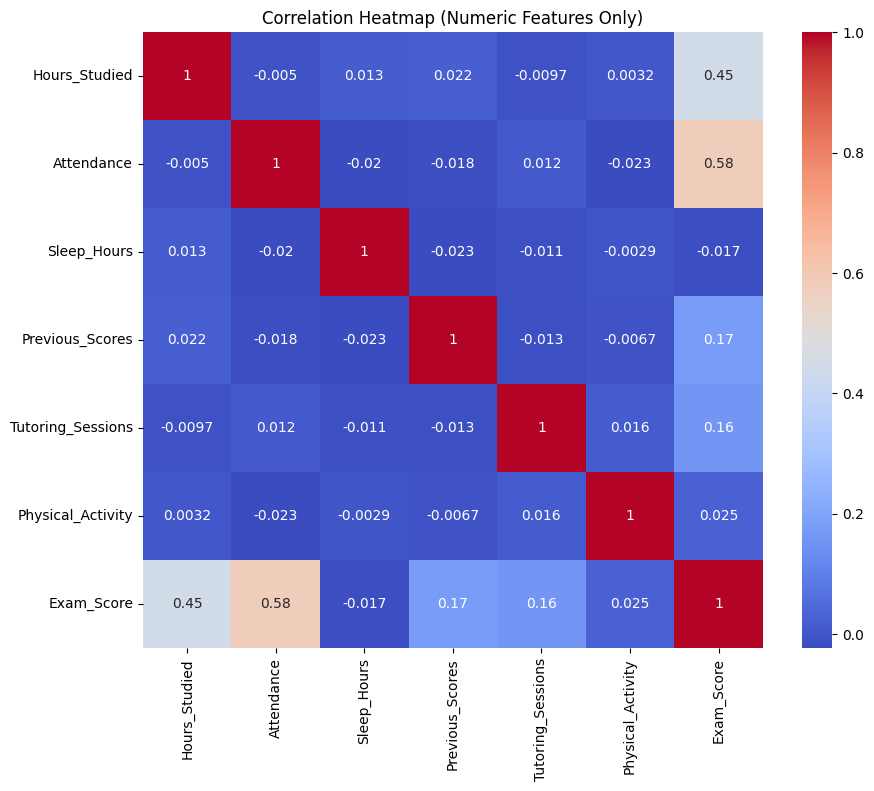

In [ ]:


plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


# **Scatter Plot – Study Hours vs Exam Score**

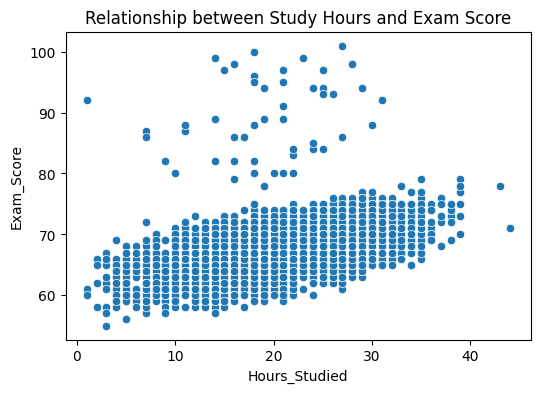

In [ ]:

plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="Hours_Studied", y="Exam_Score")
plt.title("Relationship between Study Hours and Exam Score")
plt.show()

numeric_df = df.select_dtypes(include=['number'])


# **Train-Test Split – Single Feature**

In [ ]:

X = df[["Hours_Studied"]]
y = df["Exam_Score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Linear Regression – Single Feature**

In [ ]:

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)


print("mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Mean Squared Error: 12.351733799445535
R2 Score: 0.2051306083246669


# **Visualize Linear Regression Predictions**

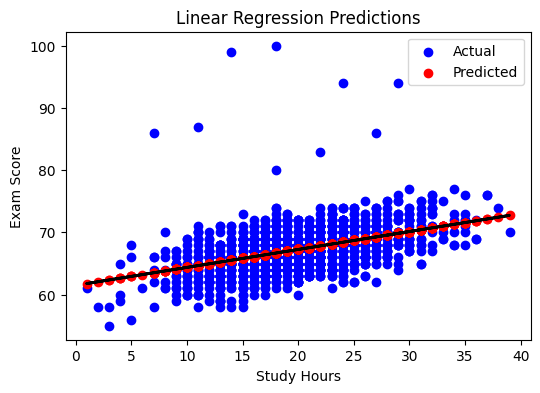

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(X_test, y_test, color="blue", label="Actual")
plt.scatter(X_test, y_pred, color="red", label="Predicted")
plt.plot(X_test, y_pred, color="black", linewidth=2)
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.legend()
plt.title("Linear Regression Predictions")
plt.show()


# ** BONUS**

# **polynomial Regression – Single Feature**


In [ ]:

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)


X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)


poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train_poly)


y_pred_poly = poly_reg.predict(X_test_poly)


print("Polynomial Regression (degree=2) MSE:", mean_squared_error(y_test_poly, y_pred_poly))
print("Polynomial Regression (degree=2) R2:", r2_score(y_test_poly, y_pred_poly))


Polynomial Regression (degree=2) MSE: 12.352544212816404
Polynomial Regression (degree=2) R2: 0.2050784559067499


In [ ]:
print("Linear Regression R2:", r2_score(y_test, y_pred))
print("Polynomial Regression R2:", r2_score(y_test_poly, y_pred_poly))


Linear Regression R2: 0.2051306083246669
Polynomial Regression R2: 0.2050784559067499


# **Encode Categorical Features**

In [ ]:

df_encoded = pd.get_dummies(df, drop_first=True)

df_encoded.head()
print(df_encoded.columns)

Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score',
       'Parental_Involvement_Low', 'Parental_Involvement_Medium',
       'Access_to_Resources_Low', 'Access_to_Resources_Medium',
       'Extracurricular_Activities_Yes', 'Motivation_Level_Low',
       'Motivation_Level_Medium', 'Internet_Access_Yes', 'Family_Income_Low',
       'Family_Income_Medium', 'Teacher_Quality_Low', 'Teacher_Quality_Medium',
       'School_Type_Public', 'Peer_Influence_Neutral',
       'Peer_Influence_Positive', 'Learning_Disabilities_Yes',
       'Parental_Education_Level_High School',
       'Parental_Education_Level_Postgraduate', 'Distance_from_Home_Moderate',
       'Distance_from_Home_Near', 'Gender_Male'],
      dtype='object')


# **Define Function to Test Feature Combinations**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


def try_features(features):
    X = df_encoded[features]
    y = df_encoded["Exam_Score"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    return r2_score(y_test, y_pred)



# **Test Different Feature Combinations**


In [ ]:


combo1 = ["Hours_Studied"]
combo2 = ["Hours_Studied", "Sleep_Hours", "Attendance"]
combo3 = ["Hours_Studied", "Attendance", "Previous_Scores"]

print("R2- score result for each combo")
print("Combo1 (Hours_Studied):", try_features(combo1))
print("Combo2 (+ Sleep, Attendance):", try_features(combo2))
print("Combo3 (+ Previous Scores):", try_features(combo3))


R2- score result for each combo
Combo1 (Hours_Studied): 0.2051306083246669
Combo2 (+ Sleep, Attendance): 0.5483304011758173
Combo3 (+ Previous Scores): 0.5831169331173267


# **Visualize Feature Combination Performance**

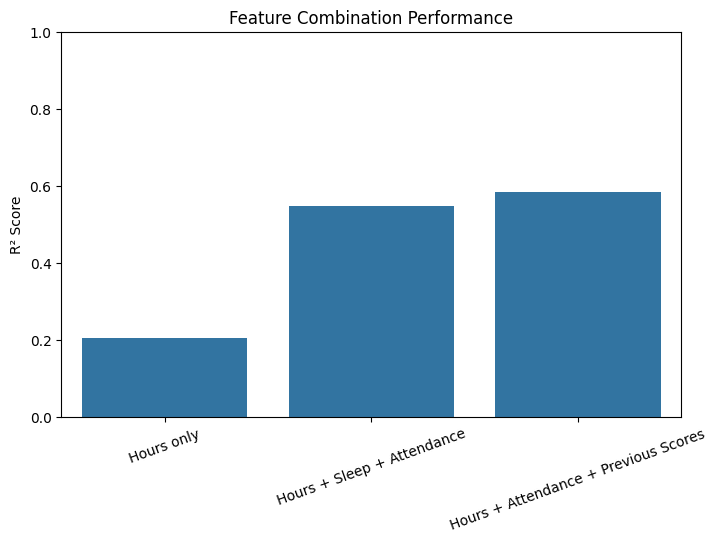

In [ ]:

results = {
    "Hours only": try_features(combo1),
    "Hours + Sleep + Attendance": try_features(combo2),
    "Hours + Attendance + Previous Scores": try_features(combo3)

}

plt.figure(figsize=(8,5))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.ylabel("R² Score")
plt.title("Feature Combination Performance")
plt.ylim(0, 1)
plt.xticks(rotation=20)
plt.show()
